# Prevendo o preço das casas em Boston

### Utilizando os dados já disponíveis no scikit-learn vamos prever o posssíivel preço de uma casa na cidade de Boston/EUA conforme diferentes variáveis, como; número de quartos, localização, construção etc.

In [1]:
# Importando o NumPy, Pandas, SciPy, Matplotlib e Sklearn
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [2]:
# Como o dataset já está disponível no sklearn vamos somente carregá-lo
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# Visualizando o arquivo (número de linhas e colunas)
boston.data.shape

(506, 13)

In [4]:
# Verificando o título de cada cabeçalho
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
# Convertendo o dataset para o Pandas e exibindo somente as primeiras linhas
dados = pd.DataFrame(boston.data)
dados.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Convertendo o título das colunas
dados.columns = boston.feature_names
dados.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# Visualizando os valores principais de cada linha, ou seja, o preço das casas
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
# Acrescentando uma nova coluna para o DataFrame com o seu respectivo valor target
dados["PRICE"] = boston.target
dados.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Utilizando o Scikit-Learn para prever o preço das casas

### X - variável independente (características das casas)
### Y - variável dependente (preço das casas)

In [9]:
# Importando o módulo de regressão linear 
from sklearn.linear_model import LinearRegression

In [10]:
# Na variável X não queremos utilizar o valor do preço das casas, então esta coluna será retirada
X = dados.drop("PRICE", axis = 1)

In [11]:
# Definindo a variável Y
Y = dados.PRICE

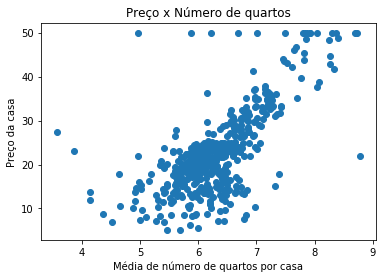

In [12]:
# Elaborando um gráfico de realação entre o preço x quantidade de quartos da casa
plt.scatter(dados.RM, Y)
plt.xlabel("Média de número de quartos por casa")
plt.ylabel("Preço da casa")
plt.title("Preço x Número de quartos")
plt.show()

In [13]:
# Criando o modelo de regressão linear 
regressao = LinearRegression()

In [14]:
# Treinando o modelo
regressao.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

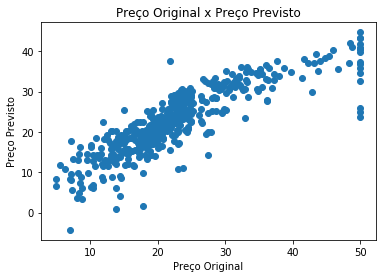

In [15]:
# Comparando preço original x preço previsto
plt.scatter(dados.PRICE, regressao.predict(X))
plt.xlabel("Preço Original")
plt.ylabel("Preço Previsto")
plt.title("Preço Original x Preço Previsto")
plt.show()

### No gráfico podemos observar no canto superior direito dados que estão incorretos, uma vez que a previsão não conseguiu apurar com eficácia. Sendo assim, teremos que dividir nossos datasets em treino e teste, para assim conseguir uma maior eficiência nos dados

In [16]:
# Para dividi-los de forma aleatória utilizamos o módulo abaixo
from sklearn.model_selection import train_test_split

In [17]:
# Agora dividindo X e Y em treino e teste
# Para não esquecer: X = o que vamos dividir / dados.PRICE = coluna que estão o dados que vamos dividir / test_size = % 
# (30% para treino e 70% para teste) / random_state = aleatório 
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, dados.PRICE, test_size = 0.30, random_state = 5)

In [18]:
# Visualizando o shape dos dados. OBS: o número de linhas deve ser igual treino (X,Y) e teste (X,Y)
print (X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(354, 13) (152, 13) (354,) (152,)


In [19]:
# Construindo o modelo de regresão linear
regressao = LinearRegression()

In [20]:
# Treinando o modelo
regressao.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

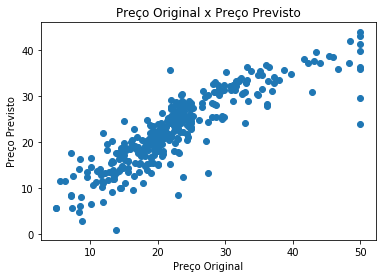

In [21]:
# Comparando preço original x preço previsto dos valores treinos
plt.scatter(Y_treino, regressao.predict(X_treino))
plt.xlabel("Preço Original")
plt.ylabel("Preço Previsto")
plt.title("Preço Original x Preço Previsto")
plt.show()

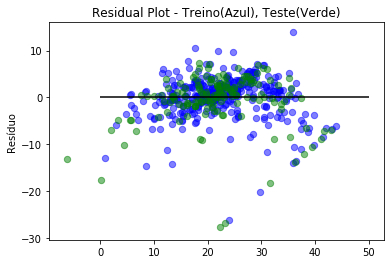

In [22]:
# Coorelação preço original x preço previsto testes e treino
plt.scatter(regressao.predict(X_treino), regressao.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regressao.predict(X_teste), regressao.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()